In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

# 設定 data_path
dir_data = '../homecredit/'

In [2]:
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
#繪圖涵式

## 練習時間

觀察有興趣的欄位的資料分佈，並嘗試找出有趣的訊息
#### Eg
- 計算任意欄位的平均數及標準差
- 畫出任意欄位的[直方圖](https://zh.wikipedia.org/zh-tw/%E7%9B%B4%E6%96%B9%E5%9B%BE)

### Hints:
- [Descriptive Statistics For pandas Dataframe](https://chrisalbon.com/python/data_wrangling/pandas_dataframe_descriptive_stats/)
- [pandas 中的繪圖函數](https://amaozhao.gitbooks.io/pandas-notebook/content/pandas%E4%B8%AD%E7%9A%84%E7%BB%98%E5%9B%BE%E5%87%BD%E6%95%B0.html)


In [4]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
app_train['DAYS_EMPLOYED'].sum()
#加總

19623828581

In [6]:
app_train['DAYS_EMPLOYED'].mean()
#平均

63815.04590404896

In [7]:
app_train['DAYS_EMPLOYED'].min()
#最小值
app_train['DAYS_EMPLOYED'].median()
#中位數
app_train['DAYS_EMPLOYED'].max()
#最大值

365243

In [8]:
app_train['DAYS_EMPLOYED'].describe()
#描述

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [9]:
app_train['DAYS_EMPLOYED'].count()
#計蘭欄位總數

307511

In [10]:
print(app_train['DAYS_EMPLOYED'].var())
#變異數
print(app_train['DAYS_EMPLOYED'].std())
#標準差

19958842205.435524
141275.7665186621


In [11]:
print(app_train['DAYS_EMPLOYED'].skew())
#偏態
print(app_train['DAYS_EMPLOYED'].kurt())
#峰度

1.6643461980685423
0.7716123806586115


In [12]:
s=app_train.corr()
display(s.count)

<bound method DataFrame.count of                              SK_ID_CURR    TARGET  CNT_CHILDREN  \
SK_ID_CURR                     1.000000 -0.002108     -0.001129   
TARGET                        -0.002108  1.000000      0.019187   
CNT_CHILDREN                  -0.001129  0.019187      1.000000   
AMT_INCOME_TOTAL              -0.001820 -0.003982      0.012882   
AMT_CREDIT                    -0.000343 -0.030369      0.002145   
AMT_ANNUITY                   -0.000433 -0.012817      0.021374   
AMT_GOODS_PRICE               -0.000232 -0.039645     -0.001827   
REGION_POPULATION_RELATIVE     0.000849 -0.037227     -0.025573   
DAYS_BIRTH                    -0.001500  0.078239      0.330938   
DAYS_EMPLOYED                  0.001366 -0.044932     -0.239818   
DAYS_REGISTRATION             -0.000973  0.041975      0.183395   
DAYS_ID_PUBLISH               -0.000384  0.051457     -0.028019   
OWN_CAR_AGE                    0.001818  0.037612      0.008494   
FLAG_MOBIL                   

In [13]:
app_train.cov()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.056582e+10,-5.904127e+01,-8.381982e+01,-4.436777e+07,-1.419730e+07,-6.449708e+05,-8.802091e+06,1.207224e+00,-6.727735e+05,1.984012e+07,...,4.698847e+00,4.192517e-01,2.482850e+00,5.313017e-01,-2.304033e+01,-2.497299e+01,4.417224e+01,45.722000,83.687998,895.504293
TARGET,-5.904127e+01,7.421192e-02,3.774480e-03,-2.572156e+02,-3.329871e+03,-5.060535e+01,-3.990170e+03,-1.402681e-04,9.301338e+01,-1.729247e+03,...,-1.945369e-04,-9.018809e-06,1.321271e-06,1.848698e-05,2.082225e-05,7.994510e-05,4.303294e-05,-0.003047,-0.000429,0.009943
CNT_CHILDREN,-8.381982e+01,3.774480e-03,5.214593e-01,2.205820e+03,6.235671e+02,2.237060e+02,-4.874046e+02,-2.554179e-04,1.042894e+03,-2.446582e+04,...,2.613594e-04,1.521749e-05,1.606428e-05,-3.237726e-05,-2.492105e-05,-2.938695e-05,-3.618439e-04,-0.007184,-0.004515,-0.056364
AMT_INCOME_TOTAL,-4.436777e+07,-2.572156e+02,2.205820e+03,5.622739e+10,1.497168e+10,6.587001e+08,1.398799e+10,2.453087e+02,2.820962e+07,-2.151468e+09,...,6.664529e+01,1.392615e+01,1.292048e+00,-2.554992e+00,1.477063e+01,8.099070e+01,1.213714e+02,5619.742206,958.417938,5427.589564
AMT_CREDIT,-1.419730e+07,-3.329871e+03,6.235671e+02,1.497168e+10,1.619988e+11,4.492695e+09,1.467708e+11,5.552370e+02,-9.737131e+07,-3.800575e+09,...,1.240755e+03,2.069314e+02,2.811662e+02,-1.189319e+02,-1.325779e+02,1.899996e+02,-1.056284e+02,20190.890033,5119.011266,-36660.699977
AMT_ANNUITY,-6.449708e+05,-5.060535e+01,2.237060e+02,6.587001e+08,4.492695e+09,2.100684e+08,4.150001e+09,2.374054e+01,5.974323e+05,-2.136346e+08,...,-1.268294e+01,1.616435e+00,3.824309e+00,-4.667345e+00,4.659010e+00,3.483036e+00,4.087934e+01,516.022963,115.677189,-304.483954
AMT_GOODS_PRICE,-8.802091e+06,-3.990170e+03,-4.874046e+02,1.398799e+10,1.467708e+11,4.150001e+09,1.364907e+11,5.290211e+02,-8.615999e+07,-3.385023e+09,...,1.086923e+03,1.827920e+02,2.633309e+02,-9.702120e+01,-1.008204e+02,1.924912e+02,-7.655799e+01,19203.110188,4847.839544,-35413.554555
REGION_POPULATION_RELATIVE,1.207224e+00,-1.402681e-04,-2.554179e-04,2.453087e+02,5.552370e+02,2.374054e+01,5.290211e+02,1.913043e-04,-1.785573e+00,-7.776613e+00,...,1.660221e-05,7.972667e-07,-1.397184e-08,8.698106e-07,-2.564171e-06,2.130196e-06,-6.045288e-06,0.000990,-0.000014,0.000026
DAYS_BIRTH,-6.727735e+05,9.301338e+01,1.042894e+03,2.820962e+07,-9.737131e+07,5.974323e+05,-8.615999e+07,-1.785573e+00,1.904440e+07,-3.796962e+08,...,1.743789e+01,3.846220e-01,8.858744e-01,2.178571e+00,1.909688e+00,1.076188e+00,-1.178121e+00,5.414437,-40.375077,-579.836968
DAYS_EMPLOYED,1.984012e+07,-1.729247e+03,-2.446582e+04,-2.151468e+09,-3.800575e+09,-2.136346e+08,-3.385023e+09,-7.776613e+00,-3.796962e+08,1.995884e+10,...,-5.124737e+02,-3.459042e+01,-3.224282e+01,-2.170448e+01,-5.601883e+01,7.381734e+00,8.871663e+01,-4453.033819,1719.069618,13183.404288


In [14]:
app_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [15]:
print('總資料數：',app_train.shape)
print('資料型態：')
display(app_train.dtypes.value_counts())
print('所有欄位概述：')
display(app_train.describe())

總資料數： (307511, 122)
資料型態：


float64    65
int64      41
object     16
dtype: int64

所有欄位概述：


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


C:\Users\wu3so\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


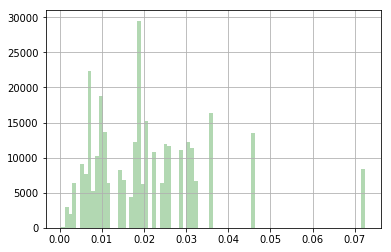

In [16]:
app_train['REGION_POPULATION_RELATIVE'].hist(bins=80, alpha=0.3, color='g', normed=False)
plt.show()

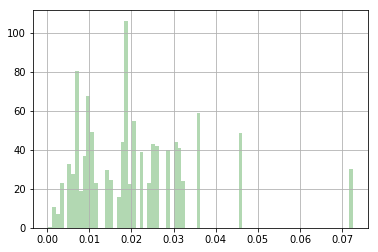

In [17]:
app_train['REGION_POPULATION_RELATIVE'].hist(bins=80, alpha=0.3, color='g', normed=True)
plt.show()

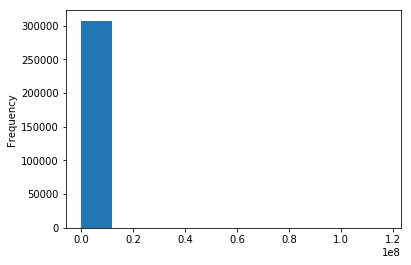

In [21]:
app_train['AMT_INCOME_TOTAL'].plot.hist()